# Husam Abdelrahim
##### Week 5 Assignment

# Airport and Weather Data Analysis

## Introduction

In week 5 assignment in this notebook we are tasked to analyze the airport and teh weather data that we are closely to investigate and answer the following three questions that is provided:
1. The first question it's asking to find the northernmost airport in the United States
2. The second question we are tasked to find the easernmost airport in the United States
3. On Feb 12, 2013 we are going to locate on what New York area had the windiest weather

I will be using pandas for data manipulation and then I will be using matplotlib for visualization

In [188]:
# we will be working with pandas and matplotlib to show visualization at the end of the work 
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data that is provided from github and the purpose of it basically 

### To properly load the file ensure the files are in 1 folder or use import os and the proper directory file 

In [189]:
# For this section we will load the data sets that is provided

airports = pd.read_csv('airports.csv') # this csv includes airports of geographic coordinates 
weather = pd.read_csv('weather.csv') # while this csv provide info of different airports and the measurements of windspeed 


# these are the two requirements as needed and the csv we will be working with

# Question 1

In order for us to analyize and identify the northernmost aiprt in the United States, we have:

1. We are going to filter the airports tzone (timezone) with America the goal here is to display isolation with the United States Airport
2. The next that we must look at is the latitude and if we do this in a descending order that would be a highter latitude with basically = further north
3. Then we are going to extract the top result, analyze and match it with relevant detail as provided. 

### Approach 

The approach that we are going to be using basically relies on the fact of the United States Airports use in America timezone in their tzone field
As the lat values tend to increase as we continue going northward, a high lat value would basically display the norternmostlocation as provided

In [190]:
# Question 1: Finding the northermost airport in the US and the the filter for the US airports and understanding the timezomes in America

us_airports = airports[airports['tzone'].str.startswith('America', na=False)]

In [191]:
# we will be sorting by latitude with teh descening order and also finding the northernmost airports 
norternmost_airports = us_airports.sort_values('lat', ascending=False).head(5)

In [192]:
print("Top 5 Northernmost United States Airport:")
print(norternmost_airports[['faa', 'name', 'lat', 'lon']].reset_index(drop=True))

norternmost_airports = norternmost_airports.iloc[0]

# using iloc means that to access the data and ability manipulate the data as well 

Top 5 Northernmost United States Airport:
   faa                                        name        lat         lon
0  BRW                  Wiley Post Will Rogers Mem  71.285446 -156.766003
1  AIN                          Wainwright Airport  70.638056 -159.994722
2  K03                               Wainwright As  70.613378 -159.860350
3  ATK  Atqasuk Edward Burnell Sr Memorial Airport  70.467300 -157.436000
4  UUK                        Ugnu-Kuparuk Airport  70.330833 -149.597500


In [193]:
# we will be displayed the results 

print(type(norternmost_airports))


northernmost = norternmost_airports  

print("\nNorternmost United States Airport: ")
print(f"Name: {northernmost.name} ({northernmost.faa})")  
print(f"Latitude: {northernmost.lat:.6f}" + chr(176) + "N")
print(f"Timezone: {northernmost.tzone}")



<class 'pandas.core.series.Series'>

Norternmost United States Airport: 
Name: 230 (BRW)
Latitude: 71.285446°N
Timezone: America/Anchorage


# Question 2

#### For the second part of the question now we are going to locate the easternmost airport that is located in the United States 

## Just like what we did with the first one we are actually going to be doing the safe and trying to identify the easternmost United State Airport, we really must consider on how the longtitude works in this scenario:

1. Understanding and the filter of teh United States airports just like in question 1
2. We will be sorting the longitude and of course it's going to be in ascending order
3. Same process as the first question extract the top result, analyze and make sure that is relevant to the deatils that is provided

### Note on the longitude

To understand the geographic coordinates one must that the longitude ranges from -180 to +180 and because the United State to tend to span the NA, basically the US lngitudes are going to result in negative numbers of course
the easrnmost will be the one on the longitude value that would be very clost to the number 0

However, we are going to be mindfus like understand the stretch that Alaska provide and in general just corssing the data line or have some sort of impact with the the values of the longitude. 

# SIDE NOTE

### First we need to consider on the date line and we are going to sort by longitude to find airports that is somewhat close to the date line



In [194]:
easternmost_airports = us_airports.sort_values('lon', ascending=True).head(5)

In [195]:
# we will be locating for the top 5 results this time for Easternmost United States Airport!

print(type(easternmost_airports))


easternmost = easternmost_airports

print("\nTop 5 Easternmost United States Airports: ")
print(easternmost_airports[['faa', 'name', 'lat', 'lon']].reset_index(drop=True))

<class 'pandas.core.frame.DataFrame'>

Top 5 Easternmost United States Airports: 
   faa              name        lat         lon
0  ADK      Adak Airport  51.878000 -176.646000
1  AKB      Atka Airport  52.220278 -174.206389
2  GAM   Gambell Airport  63.766800 -171.733000
3  SVA  Savoonga Airport  63.686400 -170.493000
4  SNP    St Paul Island  57.167333 -170.220444


In [196]:
# now we are to get teh details for the Easternmost United States airport

easternmost = easternmost_airports.iloc[0] 

In [197]:
print(type(easternmost_airports))

easternmost = easternmost_airports.iloc[0]

print("\nEasternmost United States Airport: ")
print(f"Name: {easternmost['name']} ({easternmost['faa']})")
print(f"Longitude: {easternmost['lon']:.6f}" + chr(176) + "W")
print(f"Timezone: {easternmost['tzone']}")

<class 'pandas.core.frame.DataFrame'>

Easternmost United States Airport: 
Name: Adak Airport (ADK)
Longitude: -176.646000°W
Timezone: America/Anchorage


# Question 3

#### For this section what we are going to take a look around the New York area airport which is does it really have the windest weather so we are going to find out

In this part of the assignment we are now going to look at New York airport that has experienced windiest condition and :
1. Now what is being done is that we are going to be identify major airports of New York which is of course going to be JFK, Lagaudia, and EWR
2. Now we are tasked to specifically focus on February 12, 2013
3. We will be perofrming calculation of the max wind speed for each aiport that is provided in this data 
4. Then we are going to find any unusal data that seems wrong, this is where we will be point out strange behaviors in the data/anamolies

### Data Cleaning

Once again, when working with data, whether if it's with this scenario or any other scenario we have look data that doesn't seem usual or portrays bad behaviors.
As we can see there are some certain unrealstic of wind speed that is be displayed at EWR which as we can see 1048 and this is a clear sign of error

So the approach we are going to take is:
1. find any stange value that is presented in the data
2. we have to set a reasonable threshold
3. and recolating the wind and this time once we have cleaned the data that was provided 

In [198]:
# We are going to firstly identify the NY airports

ny_airports = us_airports[
    us_airports['name'].str.contains('Kennedy|LaGuardia|Newark', na=False)
]

In [199]:
print("\nNew York Area Major Airports:")
print(ny_airports[['faa', 'name']])


New York Area Major Airports:
      faa                 name
460   EWR  Newark Liberty Intl
691   JFK  John F Kennedy Intl
1446  ZRP  Newark Penn Station


# Next step

### We are going to filter the deat of Feb 12 as stated and the New York Airports for better analysis

In [200]:
feb12_2013 = weather[
    (weather['year'] == 2013) & 
    (weather['month'] == 2) & 
    (weather['day'] == 12) & 
    (weather['origin'].isin(ny_airports['faa']))
]

# Getting the wind speed of each port for that specific day

In [201]:
max_wind_by_airport = feb12_2013.groupby('origin')['wind_speed'].max().reset_index()
print("\nMaximum Wind that occured on Feb 12, 2013:")
print(max_wind_by_airport)


Maximum Wind that occured on Feb 12, 2013:
  origin  wind_speed
0    EWR  1048.36058
1    JFK    20.71404


# Finding the windiest airpot now

In [202]:
windiest_airport_code = max_wind_by_airport.loc[max_wind_by_airport['wind_speed'].idxmax(), 'origin']
windiest_airport_speed = max_wind_by_airport['wind_speed'].max()
windiest_airport_name = ny_airports[ny_airports['faa'] == windiest_airport_code]['name'].values[0]

print(f"\nThe windiest NY airport on Feb 12, 2013 was {windiest_airport_name} ({windiest_airport_code}) "
      f"with maximum wind speed of {windiest_airport_speed:.2f} mph")


The windiest NY airport on Feb 12, 2013 was Newark Liberty Intl (EWR) with maximum wind speed of 1048.36 mph


# after reviewing the data we can see there is such large and exteremly high wind speed value which is very unusual
# for example 1048.36 3 AM does not seem to be right
# But this could be a data error so it's important to continue on investingating 

In [203]:
# let's introduce a more reasabole analysis

feb12_2013_cleaned = feb12_2013[feb12_2013['wind_speed'] < 100]  
max_wind_by_airport_cleaned = feb12_2013_cleaned.groupby('origin')['wind_speed'].max().reset_index()

print("\nCorrected Maximum Wind Speeds on Feb 12, 2013 (excluding anomalies):")
print(max_wind_by_airport_cleaned)

windiest_airport_code_cleaned = max_wind_by_airport_cleaned.loc[max_wind_by_airport_cleaned['wind_speed'].idxmax(), 'origin']
windiest_airport_speed_cleaned = max_wind_by_airport_cleaned['wind_speed'].max()
windiest_airport_name_cleaned = ny_airports[ny_airports['faa'] == windiest_airport_code_cleaned]['name'].values[0]

print(f"\nAfter data cleaning, the windiest NY airport on Feb 12, 2013 was {windiest_airport_name_cleaned} ({windiest_airport_code_cleaned}) "
      f"with maximum wind speed of {windiest_airport_speed_cleaned:.2f} mph")


Corrected Maximum Wind Speeds on Feb 12, 2013 (excluding anomalies):
  origin  wind_speed
0    EWR    21.86482
1    JFK    20.71404

After data cleaning, the windiest NY airport on Feb 12, 2013 was Newark Liberty Intl (EWR) with maximum wind speed of 21.86 mph


# Let's visualize the wind speeds that is being occured throughout the day at New York Airports!

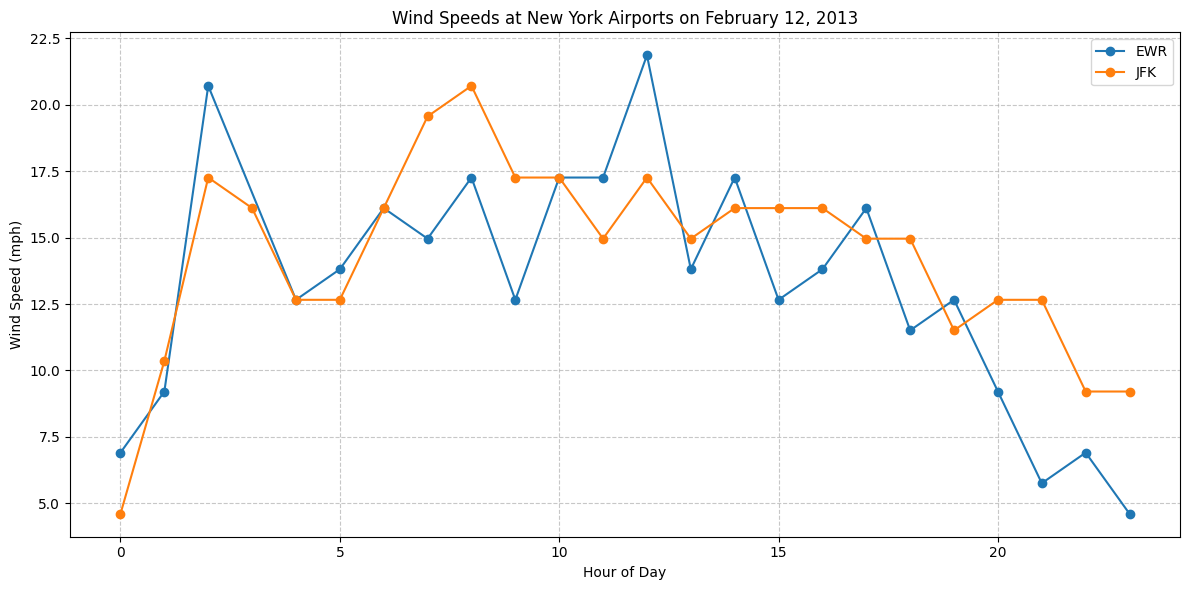

In [204]:
plt.figure(figsize=(12, 6))

for airport in feb12_2013_cleaned['origin'].unique():
    airport_data = feb12_2013_cleaned[feb12_2013_cleaned['origin'] == airport]
    plt.plot(airport_data['hour'], airport_data['wind_speed'], marker='o', label=airport)

plt.title('Wind Speeds at New York Airports on February 12, 2013')
plt.xlabel('Hour of Day')
plt.ylabel('Wind Speed (mph)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('ny_airport_winds_feb12_2013.png')

## Results Summary

### Northernmost US Airport
**Wiley Post Will Rogers Memorial Airport (BRW)**
- Location: Barrow, Alaska
- Latitude: 71.285446°N
- Timezone: America/Anchorage

### Easternmost US Airport
**Adak Airport (ADK)**
- Location: Adak, Alaska
- Longitude: -176.646000°W
- Timezone: America/Anchorage

### Windiest NY Airport that was provided on Feb 12, 2013

**Newark Liberty Interanation (EWR)**

- The max wind speed after cleaning the data was: 21.86 mph
- JFK max wind speed was : 20.71 mph

### Visualization 

With what is being occured here as we can see in the visualization is that the line chart shows the winds speeds hourly and both airports that is being conducted throughout the day,
this allows us to compare the wind conditions that is being occured at each location 

# Conclusion

So overall the analysis that was demsotrated is that one it's very important to clean the data and ability to valdiate when it comes down to working with real world data sets that was presented,
as we see here the wind speed that was at Newark was very unusual and would have led to misleading answers if not idenitfied and if I haven't taken steps to review the data once more.

The geographic analysis we needed to know how the coordinates work, especially understanding with how the longitudes values work and having the knowledge of the time zone data

As we can see once again the East Coast weather patterns can be vary in many ways especially in between the aiports just like as presented Newark and JFK 